In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
logger = phoebe.logger()

In [3]:
b = phoebe.default_binary(contact_binary = True)

In [4]:
#b.add_constraint('semidetached', 'primary')

In [5]:
#b.add_constraint('semidetached', 'secondary')

In [6]:
b['requiv@constraint@primary']

<ParameterSet: EMPTY>

In [7]:
b['period@orbit'] = 1
b['sma@orbit'] = 1
b['incl@orbit'] = 78
b['q@binary'] = 0.44
b['requiv@primary'] = 0.5
#b['requiv@secondary'] = 0.8
#b['teff@primary'] = 5660.
#b['teff@secondary'] = 5656.

Tue, 08 Dec 2020 00:34 BUNDLE       ERROR   Constraint 'pot@contact_envelope@envelope@constraint' raised the following error while attempting to solve for 'pot@contact_envelope@envelope@component'.  Consider flipping the constraint or changing the value of one of ['requiv@primary@star@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'pot@contact_envelope@envelope@component'] until the constraint succeeds.  Original error: roche_contact_Omega_at_partial_vol::Volume is outside bounds.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING secondary is underflowing at L1 and not a contact system (requiv=0.4477611940298506, requiv_min=1.2725418568681297, requiv_max=1.6724563972838378)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  I

Tue, 08 Dec 2020 00:34 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING secondary is underflowing at L1 and not a contact system (requiv=0.4477611940298506, requiv_min=1.2725418568681297, requiv_max=1.6724563972838378)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not

Tue, 08 Dec 2020 00:34 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.37986324085615814, requiv_max=0.49924071560711597)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.

Tue, 08 Dec 2020 00:34 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=0.4477611940298506, requiv_min=0.3102496808894846, requiv_max=0.39464229494181874)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING primary is overflowing at L2/L3 (requiv=1.5, requiv_min=0.4535195511588265, requiv_max=0.5286203859723391)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 08 Dec 2020 00:34 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=0.4477611940298506, requiv_min=0.3102496808894846, requiv_max=0.39464229494181874)  If not address

In [8]:
#b['requiv@constraint@primary']

In [9]:
b.add_dataset('lc', times=np.linspace(0, 1, 151),passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: figure, dataset, constraint, compute>

In [10]:
b.add_dataset('mesh', times=[0.25])

Tue, 08 Dec 2020 00:34 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: figure, dataset, constraint, compute>

In [11]:
b.run_compute(irrad_method = 'none')

100%|██████████| 152/152 [00:04<00:00, 30.76it/s]


<ParameterSet: 13 parameters | kinds: mesh, lc>

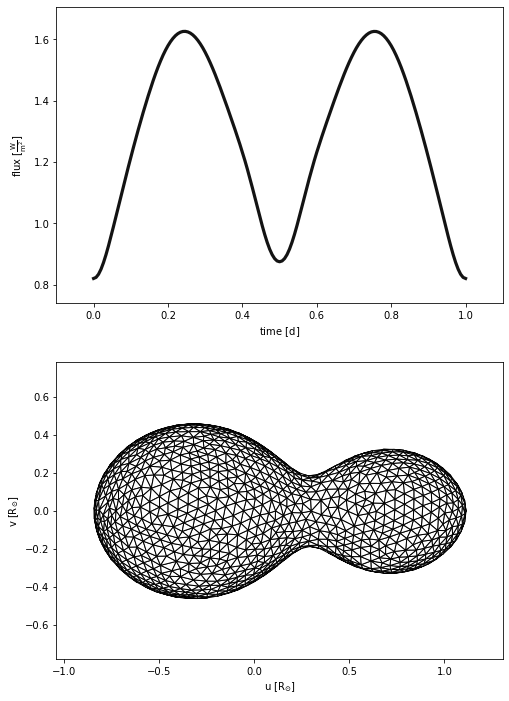

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [12]:
b.plot(show=True)

In [13]:
ls

dxcode.ipynb   GIF.ipynb        lightcurve.ipynb  PHRASEMCMC.ipynb
funcfit.ipynb  licurdata.ipynb  mcmclc.ipynb


In [14]:
np.savetxt('data.lc', 
           np.vstack((b['value@times@lc01@model'], b['value@fluxes@lc01@model']+np.random.normal(0, 0.05, 151))).T)